In [7]:
# Install necessary libraries
!pip install requests pandas matplotlib

import requests
import pandas as pd
import matplotlib.pyplot as plt
import json

In [17]:
# API Endpoint and Parameters
url = "https://markets.newyorkfed.org/api/rates/unsecured/effr/search.json"
params = {
    "startDate": "2015-01-01",
    "endDate": "2024-12-31"
}

# Fetch Data
response = requests.get(url, params=params)
data = response.json()

# Extract Relevant Data
effr_data = data["refRates"]
effr_df = pd.DataFrame(effr_data)

# Keep only relevant columns
effr_df = effr_df[["effectiveDate", "percentRate"]]

# Rename columns
effr_df.rename(columns={
    "effectiveDate": "Date",
    "percentRate": "EFFR Value"
}, inplace=True)

# Convert to datetime and float
effr_df["Date"] = pd.to_datetime(effr_df["Date"])
effr_df["EFFR Value"] = effr_df["EFFR Value"].astype(float)

# Filter for valid range (if needed)
effr_df = effr_df[(effr_df["Date"] >= "2015-01-01") & (effr_df["Date"] <= "2024-12-31")]

# Check for duplicates and sorting
effr_df.sort_values("Date", inplace=True)
is_sorted = effr_df.equals(effr_df.sort_values("Date"))
print("Is data sorted chronologically?", is_sorted)
print(f"There are {effr_df.duplicated().sum()} duplicate rows.")

# Descriptive statistics
print(effr_df.describe())

Is data sorted chronologically? True
There are 0 duplicate rows.
                                Date   EFFR Value
count                           2512  2512.000000
mean   2019-12-30 07:43:11.082802688     1.778093
min              2015-01-02 00:00:00     0.040000
25%              2017-06-29 18:00:00     0.130000
50%              2020-01-01 00:00:00     1.160000
75%              2022-06-28 06:00:00     2.400000
max              2024-12-31 00:00:00     5.330000
std                              NaN     1.868142


In [18]:
print(effr_df.columns)

Index(['Date', 'EFFR Value'], dtype='object')


In [19]:
print(effr_df.head())

           Date  EFFR Value
2511 2015-01-02        0.12
2510 2015-01-05        0.12
2509 2015-01-06        0.12
2508 2015-01-07        0.12
2507 2015-01-08        0.12


In [20]:
# Filter for valid range (if needed)
effr_df = effr_df[(effr_df["Date"] >= "2015-01-01") & (effr_df["Date"] <= "2024-12-31")]

# Check for duplicates and sorting
effr_df.sort_values("Date", inplace=True)
is_sorted = effr_df.equals(effr_df.sort_values("Date"))
print("Is data sorted chronologically?", is_sorted)
print(f"There are {effr_df.duplicated().sum()} duplicate rows.")

Is data sorted chronologically? True
There are 0 duplicate rows.


In [21]:
# Check for missing values
print(f"Missing values in the columns:\n{effr_df.isnull().sum().to_string()}")


Missing values in the columns:
Date          0
EFFR Value    0


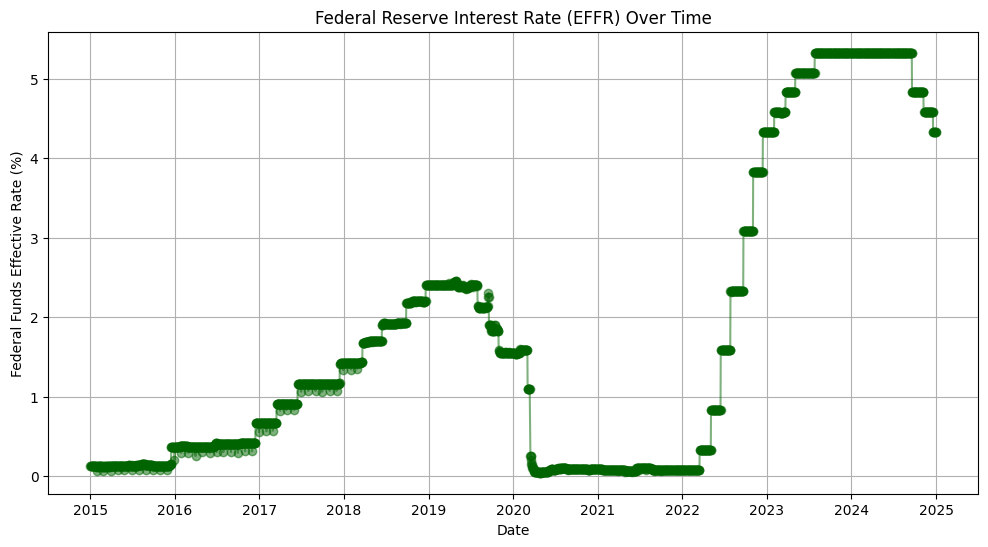

In [22]:
# Plot EFFR over time
plt.figure(figsize=(12, 6))
plt.plot(effr_df["Date"], effr_df["EFFR Value"], marker="o", linestyle="-", color="darkgreen", alpha=0.5)
plt.xlabel("Date")
plt.ylabel("Federal Funds Effective Rate (%)")
plt.title("Federal Reserve Interest Rate (EFFR) Over Time")
plt.grid(True)
plt.show()

## Federal Reserve Interest Rate (EFFR) Trends (2015–2025)
- 2015–2018: Gradual interest rate hikes as the U.S. economy recovered post-2008 financial crisis.
- 2019: Slight rate cuts in response to slowing global growth and trade tensions.
- 2020–2021: Near-zero interest rates due to the COVID-19 pandemic.
- The Fed slashed rates rapidly to stimulate borrowing, spending, and economic support.
- 2022–2023: Sharp increase in rates to combat high inflation.
- 2024: Rates peaked around 5.25%–5.5%, reflecting continued efforts to manage inflation, followed by a slight decline.
### Conclusions 
1. Sharp rise from early 2022 to mid-2023 aligns with the U.S. Federal Reserve's aggressive rate hikes to combat inflation.
2. Flat near-zero rates from 2020 to early 2022 correspond to COVID-19 monetary stimulus.
3.Gradual hikes from 2016 to 2019, then cuts in 2019–2020, consistent with Fed policy trends.

In [23]:
# Now to load the Excel sheet to see if there is a correlation between stock price and fed rate.

file_path = "Stock_Screening_CFG v2.xlsx"

# Load the "Monthly Price" sheet
df2 = pd.read_excel(file_path, sheet_name="Monthly Price", engine="openpyxl")
print(df2.head())

        Date  NasdaqGS:MSFT  NasdaqGS:AAPL  NasdaqGS:NVDA  NasdaqGS:AMZN  \
0 2024-07-20         437.11         224.31        117.930         183.13   
1 2024-06-30         446.95         210.62        123.540         193.25   
2 2024-05-31         415.13         192.25        109.633         176.44   
3 2024-04-30         389.33         170.33         86.402         175.00   
4 2024-03-31         420.72         171.48         90.356         180.38   

   NasdaqGS:GOOGL  NasdaqGS:META  NYSE:BRK.B  NasdaqGS:AVGO  NasdaqGS:TSLA  \
0          177.66         476.79      434.47        157.350         239.20   
1          182.15         504.22      406.80        160.553         197.88   
2          172.50         466.83      414.40        132.855         178.08   
3          162.78         430.17      396.73        130.027         183.28   
4          150.93         485.58      420.52        132.541         175.79   

   ...  NYSE:IVZ  NYSE:DVA  NasdaqGS:AAL  NYSE:MHK  NYSE:BEN  NYSE:RL  \
0

In [25]:
df2 = df2[(df2["Date"] >= "2014-01-01") & (df2["Date"] <= "2024-07-20")] #date to match the API range
df2.loc[:, "Date"] = df2["Date"] - pd.offsets.MonthBegin(1)
print(df2[df2["Date"].isin(effr_df["Date"])])

          Date  NasdaqGS:MSFT  NasdaqGS:AAPL  NasdaqGS:NVDA  NasdaqGS:AMZN  \
1   2024-05-01         446.95      210.62000      123.54000       193.2500   
2   2024-04-01         415.13      192.25000      109.63300       176.4400   
3   2024-03-01         389.33      170.33000       86.40200       175.0000   
4   2024-02-01         420.72      171.48000       90.35600       180.3800   
6   2023-12-01         397.58      184.40000       61.52700       155.2000   
..         ...            ...            ...            ...            ...   
105 2015-09-01          52.64       29.87500        0.70925        31.2950   
107 2015-07-01          43.52       28.19000        0.56200        25.6445   
108 2015-06-01          46.70       30.32500        0.49875        26.8075   
109 2015-05-01          44.15       31.35625        0.50275        21.7045   
110 2015-04-01          46.86       32.57000        0.55325        21.4615   

     NasdaqGS:GOOGL  NasdaqGS:META  NYSE:BRK.B  NasdaqGS:AVGO  

In [27]:
#Filter date range and adjust date column to match EFFR monthly data
df2 = df2[(df2["Date"] >= "2015-01-01") & (df2["Date"] <= "2024-12-31")]
df2.loc[:, "Date"] = df2["Date"] - pd.offsets.MonthBegin(1)

# Calculate average stock price across all columns except Date
df2["Stock_Market_Average"] = df2.iloc[:, 1:].mean(axis=1)

In [28]:
df_merged = pd.merge(effr_df, df2[["Date", "Stock_Market_Average"]], on="Date", how="inner")

print(df_merged.head())

        Date  EFFR Value  Stock_Market_Average
0 2015-04-01        0.12             74.150259
1 2015-05-01        0.13             70.408185
2 2015-06-01        0.12             68.696314
3 2015-07-01        0.13             73.857752
4 2015-09-01        0.14             72.819386


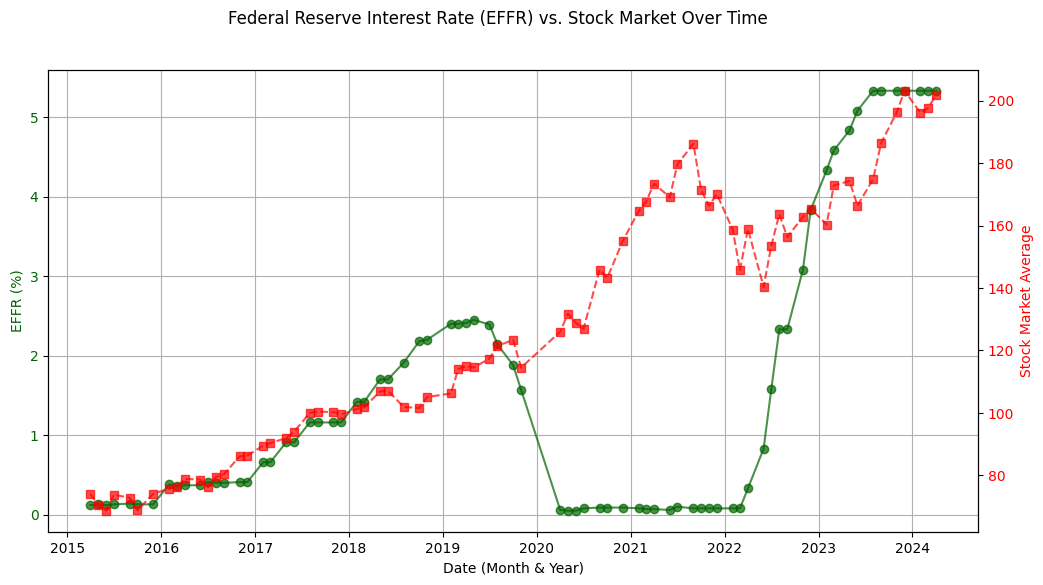

In [29]:
#plotting EFFR vs. Stock Market Average
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot EFFR (Left Y-axis)
ax1.plot(df_merged["Date"], df_merged["EFFR Value"], marker="o", linestyle="-", color="darkgreen", alpha=0.7, label="EFFR")
ax1.set_xlabel("Date (Month & Year)")
ax1.set_ylabel("EFFR (%)", color="darkgreen")
ax1.tick_params(axis="y", labelcolor="darkgreen")

# Create second Y-axis for stock prices
ax2 = ax1.twinx()
ax2.plot(df_merged["Date"], df_merged["Stock_Market_Average"], marker="s", linestyle="--", color="red", alpha=0.7, label="Stock Market Avg")
ax2.set_ylabel("Stock Market Average", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Title and formatting
fig.suptitle("Federal Reserve Interest Rate (EFFR) vs. Stock Market Over Time")
ax1.grid(True)
plt.xticks(rotation=45)

plt.show()

 EFFR vs. Stock Market: Key Insights
2015–2018: Gradual rate hikes with steady stock growth – strong economy, low inflation.

2019: Minor rate cuts – market held strong amid global slowdown concerns.

2020: Rates slashed to near-zero due to COVID – market rebounded quickly.

2022–2023: Sharp rate increases to fight inflation – market dipped, then recovered.

2024: Rates stabilized at high levels – stock market surged on optimism.

Summary of Relationship
Higher rates = lower stock growth (costlier borrowing, cautious investing)

Lower rates = higher stock growth (cheaper loans, more spending)

Stock market reacts not just to rates, but also to Fed signals and economic outlook.

